In [10]:
#import
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from arch import arch_model
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots  import plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
%matplotlib notebook

In [12]:
# get bet index from csv
bet=pd.read_csv('^bet_d.csv')
# keep 2000-2010
bet=bet[bet['Date']>='2000-01-01']
bet=bet[bet['Date']<='2010-12-31']
# set Date as index
bet = bet.set_index('Date')
# calculate the logaritmic return
bet =pd.DataFrame(bet['Close'])
log_return_bet=np.log(bet/bet.shift(1))
log_return_bet=log_return_bet[1:]

In [3]:
# made ar(1)-garch(2,2) model
amt = arch_model(log_return_bet['Close'], mean='AR', lags=1, vol='GARCH', p=2,q=2,dist='StudentsT')
fitt= amt.fit()
fitt.summary()

Iteration:      1,   Func. Count:     10,   Neg. LLF: -7020.815870584411
Iteration:      2,   Func. Count:     30,   Neg. LLF: 4413.110259179002
Iteration:      3,   Func. Count:     50,   Neg. LLF: -938.0721810469863
Iteration:      4,   Func. Count:     62,   Neg. LLF: -3134.285711860544
Iteration:      5,   Func. Count:     82,   Neg. LLF: 16747.39862953411
Iteration:      6,   Func. Count:     92,   Neg. LLF: 16028.44026357702
Iteration:      7,   Func. Count:    104,   Neg. LLF: 12243.640981719396
Iteration:      8,   Func. Count:    114,   Neg. LLF: 7604.858630881177
Iteration:      9,   Func. Count:    125,   Neg. LLF: 4803.122468153223
Iteration:     10,   Func. Count:    136,   Neg. LLF: 865.0378852941383
Iteration:     11,   Func. Count:    147,   Neg. LLF: 39.03717337283561
Iteration:     12,   Func. Count:    158,   Neg. LLF: -1154.2127074700775
Iteration:     13,   Func. Count:    172,   Neg. LLF: -2915.5282046934394
Iteration:     14,   Func. Count:    192,   Neg. LLF: 73

C:\Users\Dragos\Anaconda3\lib\site-packages\arch\univariate\base.py:293: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0003334. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  data_scale_warning.format(orig_scale, rescale), DataScaleWarning
C:\Users\Dragos\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,


<class 'statsmodels.iolib.summary.Summary'>
"""
                              AR - GARCH Model Results                              
====================================================================================
Dep. Variable:                        Close   R-squared:                     -15.738
Mean Model:                              AR   Adj. R-squared:                -15.745
Vol Model:                            GARCH   Log-Likelihood:                2902.12
Distribution:      Standardized Student's t   AIC:                          -5788.23
Method:                  Maximum Likelihood   BIC:                          -5741.61
                                              No. Observations:                 2509
Date:                      Mon, Jun 15 2020   Df Residuals:                     2501
Time:                              19:43:45   Df Model:                            8
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
Const          0.0374  1.216e-03     30.807 2.120e-208 [3.507e-02,3.983e-02]
Close[1]       3.4315      0.125     27.396 3.045e-165     [  3.186,  3.677]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      1.8922e-03  9.954e-05     19.009  1.438e-80 [1.697e-03,2.087e-03]
alpha[1]       0.3768  6.798e-02      5.543  2.977e-08     [  0.244,  0.510]
alpha[2]   6.7141e-04  7.663e-02  8.762e-03      0.993     [ -0.150,  0.151]
beta[1]        0.1011      0.121      0.838      0.402     [ -0.135,  0.338]
beta[2]        0.5234      0.112      4.680  2.873e-06     [  0.304,  0.743]
                              Distribution                              
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
nu            16.0254      0.560     28.606 5.723e-180 [ 14.927, 17.123]
========================================================================

Covariance estimator: robust
WARNING: The optimizer did not indicate successful convergence. The message was Positive directional derivative for linesearch.
See convergence_flag.

"""

In [4]:
# calculated the empirical value at risk
empiric_var=list()
for i in range(0,len(log_return_bet['Close'])):
    empiric_var.append(log_return_bet['Close'][0:i].std()*-1.645)


In [5]:
# calculated the garch value at risk
garcht=fitt.forecast(start=1).variance*-1.645

<IPython.core.display.Javascript object>


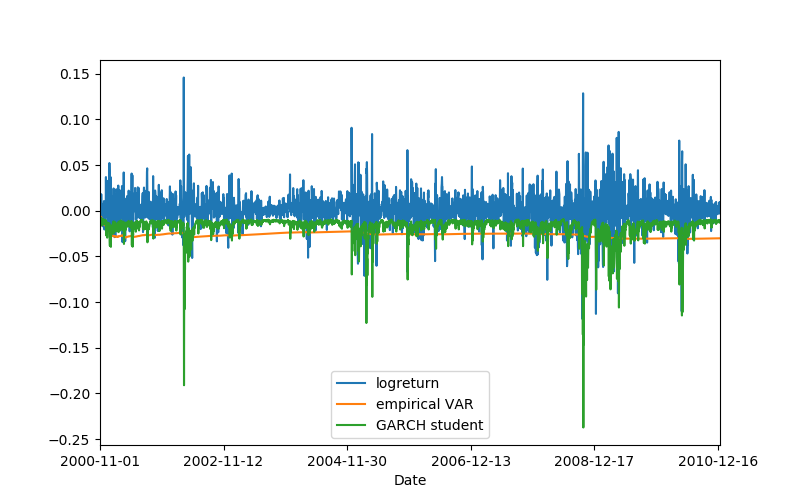

[]

In [11]:
# plot
log_return_bet['Close'].plot(figsize=(8,5),label='logreturn')
plt.plot(empiric_var, label='empirical VAR')
plt.plot(garcht, label='GARCH student')
plt.legend()
plt.plot()